In [2]:
# 薪资
    #公司规模对薪资的影响
    #公司地址对薪资的影响
    #工作经验对薪资的影响
    #学历对薪资的影响
#工作机会
    #公司规模对工作机会的影响
    #公司地址对工作机会的影响
    #工作经验对工作机会的影响
    #学历工作机会的影响
    #技能要求工作机会的影响

In [3]:
#导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# !pip install xlrd

In [5]:
#导入数据
df = pd.read_excel('./work_all_2.xls')

In [6]:
df

,job_title,company,person_number,salary,path,work,edu,skill
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析
...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,150-200/天,福州-鼓楼,无经验,本科,JavaOracle
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      3675 non-null   object
 1   company        3675 non-null   object
 2   person_number  3580 non-null   object
 3   salary         3675 non-null   object
 4   path           3675 non-null   object
 5   work           3675 non-null   object
 6   edu            3675 non-null   object
 7   skill          3672 non-null   object
dtypes: object(8)
memory usage: 229.8+ KB


In [8]:
#查看缺失值的情况
df.isnull().sum()

job_title         0
company           0
person_number    95
salary            0
path              0
work              0
edu               0
skill             3
dtype: int64

In [9]:
# 缺失比率
df.isnull().mean()

job_title        0.000000
company          0.000000
person_number    0.025850
salary           0.000000
path             0.000000
work             0.000000
edu              0.000000
skill            0.000816
dtype: float64

In [10]:
# 空值的处理
df.dropna(subset=['skill'], inplace=True)

In [11]:
df.isnull().mean()

job_title        0.000000
company          0.000000
person_number    0.025871
salary           0.000000
path             0.000000
work             0.000000
edu              0.000000
skill            0.000000
dtype: float64

In [12]:
df.shape

(3672, 8)

In [13]:
#空值的填充
df.person_number

0           20-99人 
1           20-99人 
2         100-299人 
3           20-99人 
4         100-299人 
           ...     
3670      500-999人 
3671    1000-9999人 
3672        20-99人 
3673        20-99人 
3674    1000-9999人 
Name: person_number, Length: 3672, dtype: object

In [14]:
#去重
df.person_number.unique()

array(['20-99人 ', '100-299人 ', '300-499人 ', '1000-9999人 ', nan,
       '500-999人 ', '10000人以上 ', '20人以下 '], dtype=object)

In [15]:
#求目标列众数
person_n_m = df.person_number.mode()[0]

In [16]:
person_n_m

'20-99人 '

In [17]:
df.fillna('20-99人 ', inplace=True)

In [18]:
df.isnull().sum()

job_title        0
company          0
person_number    0
salary           0
path             0
work             0
edu              0
skill            0
dtype: int64

In [19]:
#数据处理
df.salary.unique()

array(['1.2万-1.8万', '1.2万-2万', '2万-3.5万', '8千-1.5万', '1万-1.5万', '8千-1.2万',
       '7千-9千', '1万-1.8万', '7千-1.4万', '1.5万-2万', '1.2万-1.5万', '1.3万-1.5万',
       '8千-1.4万', '6千-1.2万', '7千-1万', '6千-1万', '6千-8千', '8千-1.3万',
       '1万-1.3万', '8千-1万', '9千-1.2万', '面议', '6千-9千', '1.8万-2.5万',
       '8千-1.6万', '1.3万-2.3万', '1.5万-2.5万', '1.1万-2万', '1.3万-1.8万',
       '1.5万-3万', '1.2万-2.4万', '9千-1.4万', '1.5万-2.2万', '1.6万-2.3万',
       '2万-3万', '1万-2万', '1.2万-2.2万', '2.5万-3万', '4万-6万', '1.7万-2万',
       '1.6万-2.5万', '9千-1.8万', '1.3万-2.6万', '1.6万-1.8万', '1万-1.6万',
       '1.4万-1.8万', '1.8万-2万', '1.5万-1.8万', '1.5万-2.1万', '2.5万-3.5万',
       '1.8万-3万', '3.5万-4万', '2万-4万', '1.1万-1.5万', '7千-8千', '5千-8千',
       '6千-7千', '5千-1万', '4千-6千', '5千-6千', '1万-1.4万', '7千-1.2万', '5千-7千',
       '4千-8千', '9千-1万', '1万-1.2万', '3万-6万', '9千-1.1万', '2.8万-4万',
       '1.3万-1.6万', '2.5万-4.5万', '1.5万-2.6万', '1.7万-2.5万', '2.5万-2.6万',
       '3万-5万', '8千-9千', '7千-1.1万', '1.3万-2万', '1.2万-1.7万', '1.5万-2.3万',
       '9千-1.3万', '

In [20]:
#计算薪资众数
salary_m = df.salary.mode()[0]

In [21]:
salary_m

'1万-1.5万'

In [22]:
df.salary = df.salary.str.replace('面议', '1万-1.5万')

In [23]:
df.salary = df.salary.str.replace('180-240/天', '4千-5.2千')
df.salary = df.salary.str.replace('100-150/天', '2.2千-3.3千')
df.salary = df.salary.str.replace('150-200/天', '3.3千-4.4千')
df.salary = df.salary.str.replace('190-200/天', '4千-4.4千')
df.salary = df.salary.str.replace('100-200/天', '2.2千-4.4千')

In [24]:
df.salary.unique()

array(['1.2万-1.8万', '1.2万-2万', '2万-3.5万', '8千-1.5万', '1万-1.5万', '8千-1.2万',
       '7千-9千', '1万-1.8万', '7千-1.4万', '1.5万-2万', '1.2万-1.5万', '1.3万-1.5万',
       '8千-1.4万', '6千-1.2万', '7千-1万', '6千-1万', '6千-8千', '8千-1.3万',
       '1万-1.3万', '8千-1万', '9千-1.2万', '6千-9千', '1.8万-2.5万', '8千-1.6万',
       '1.3万-2.3万', '1.5万-2.5万', '1.1万-2万', '1.3万-1.8万', '1.5万-3万',
       '1.2万-2.4万', '9千-1.4万', '1.5万-2.2万', '1.6万-2.3万', '2万-3万', '1万-2万',
       '1.2万-2.2万', '2.5万-3万', '4万-6万', '1.7万-2万', '1.6万-2.5万', '9千-1.8万',
       '1.3万-2.6万', '1.6万-1.8万', '1万-1.6万', '1.4万-1.8万', '1.8万-2万',
       '1.5万-1.8万', '1.5万-2.1万', '2.5万-3.5万', '1.8万-3万', '3.5万-4万',
       '2万-4万', '1.1万-1.5万', '7千-8千', '5千-8千', '6千-7千', '5千-1万', '4千-6千',
       '5千-6千', '1万-1.4万', '7千-1.2万', '5千-7千', '4千-8千', '9千-1万',
       '1万-1.2万', '3万-6万', '9千-1.1万', '2.8万-4万', '1.3万-1.6万', '2.5万-4.5万',
       '1.5万-2.6万', '1.7万-2.5万', '2.5万-2.6万', '3万-5万', '8千-9千', '7千-1.1万',
       '1.3万-2万', '1.2万-1.7万', '1.5万-2.3万', '9千-1.3万', '1.2万-1.6万',
 

In [25]:
df[['min_salary', 'max_salary']] = df.salary.str.split('-', 2, expand=True)

In [26]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,1.2万,1.8万
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,1.2万,2万
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,2万,3.5万
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8千,1.5万
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,1万,1.5万
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3.3千,4.4千
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8千,1.4万
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,1万,1.8万
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,1.3万,1.8万


In [27]:
df.salary = df.salary.str.replace('5千2', '5.2千')

In [28]:
def handle(salary):
    if type(salary) == str:
        if salary[-1] == '万':
            salary = float(salary[:-1]) * 10000
        elif salary[-1] == '千':
            salary = float(salary[:-1]) * 1000
        else:
            salary = float(salary)
    return salary

In [29]:
df.min_salary = df.min_salary.map(lambda salary : handle(salary))
df.max_salary = df.max_salary.map(lambda salary : handle(salary))

In [30]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0


In [31]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [32]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary,avg_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0,15000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0,16000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0,27500.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0,11500.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0,3850.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0,11000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0,14000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0,15500.0


In [33]:
#查看avg_salary中的数据分布情况
# df.avg_salary.describe()
max_num = df.avg_salary.describe([.99])['99%']

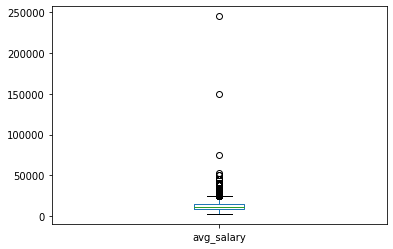

In [34]:
#画箱型图
df.avg_salary.plot(kind = 'box')

In [35]:
df = df[df.avg_salary < max_num]

In [36]:
df

,job_title,company,person_number,salary,path,work,edu,skill,min_salary,max_salary,avg_salary
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,12000.0,18000.0,15000.0
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,12000.0,20000.0,16000.0
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,20000.0,35000.0,27500.0
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,8000.0,15000.0,11500.0
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,10000.0,15000.0,12500.0
...,...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3300.0,4400.0,3850.0
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,8000.0,14000.0,11000.0
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,10000.0,18000.0,14000.0
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,13000.0,18000.0,15500.0


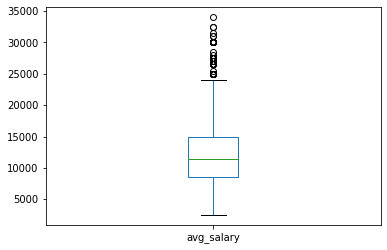

In [37]:
df.avg_salary.plot(kind = 'box')

In [38]:
# df.drop(columns=['min_salary','max_salary'],inplace=True)
df.drop(columns=['min_salary','max_salary'],inplace=True)

G:\JetBrains\ana\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df.path.unique()

array(['北京-朝阳', '北京-石景山', '北京', '北京-海淀', '北京-东城', '北京-丰台', '北京-西城',
       '北京-昌平', '北京-顺义', '北京-通州', '北京-大兴', '北京-延庆', '北京-密云', '上海-宝山',
       '上海-杨浦', '上海-嘉定', '上海-徐汇', '上海-浦东', '上海-普陀', '上海-闵行', '上海-黄浦',
       '上海-金山', '上海', '上海-静安', '上海-松江', '上海-长宁', '上海-虹口', '上海-青浦',
       '广州-海珠', '广州-番禺', '广州-黄埔', '广州-天河', '广州', '广州-白云', '广州-越秀',
       '广州-南沙', '广州-荔湾', '广州-花都', '深圳-宝安', '深圳-龙岗', '深圳', '深圳-南山',
       '深圳-罗湖', '深圳-福田', '深圳-龙华', '深圳-坪山', '深圳-光明', '武汉-江夏', '武汉-武昌',
       '武汉-硚口', '武汉-江汉', '武汉', '武汉-黄陂', '武汉-洪山', '武汉-江岸', '武汉-东西湖',
       '武汉-蔡甸', '武汉-汉阳', '武汉-东湖高新区', '武汉-新洲', '武汉-汉南', '西安-雁塔', '西安-未央',
       '西安-新城', '西安-高新区', '西安', '西安-灞桥', '西安-莲湖', '西安-长安', '西安-碑林',
       '西安-国际港务区', '西安-鄠邑', '成都-锦江', '成都-武侯', '成都-双流', '成都', '成都-青羊',
       '成都-金牛', '成都-温江', '成都-成华', '成都-新都', '成都-郫都', '成都-崇州', '成都-龙泉驿',
       '成都-高新区', '成都-天府新区', '大连-甘井子', '大连-中山', '大连-西岗', '大连', '大连-沙河口',
       '大连-金州', '大连-普兰店', '大连-庄河', '大连-高新园区', '大连-旅顺口', '长春-榆树', '长春-朝阳',
       '长春', '长春-南关', '长春

In [40]:
df['city'] = df.path.str[:2]

G:\JetBrains\ana\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df

,job_title,company,person_number,salary,path,work,edu,skill,avg_salary,city
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,15000.0,北京
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,16000.0,北京
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,27500.0,北京
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,11500.0,北京
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,12500.0,北京
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3850.0,福州
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,11000.0,福州
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,14000.0,福州
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,15500.0,福州


In [42]:
df.city.unique()

array(['北京', '上海', '广州', '深圳', '武汉', '西安', '成都', '大连', '长春', '沈阳', '南京',
       '济南', '青岛', '杭州', '苏州', '无锡', '宁波', '重庆', '郑州', '长沙', '福州'],
      dtype=object)

In [43]:
df.work.unique()

array(['3-5年', '不限', '5-10年', '1年以下', '1-3年', '无经验', '10年以上'],
      dtype=object)

In [44]:
df.edu.unique()

array(['本科', '大专', '硕士', '学历不限', '中专/中技', '博士', '高中'], dtype=object)

In [45]:
#分组转换
#学历对薪资的影响
#groupby
edu_salary = df.groupby(by='edu').avg_salary

In [96]:
edu_salary

In [46]:
#各学历区间最高薪资比较
edu_salary_max = edu_salary.max()

In [47]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBackend.figure_format = 'svg'

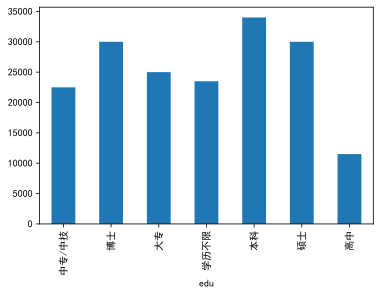

In [48]:
edu_salary_max.plot(kind='bar')

In [49]:
edu_salary_avg = edu_salary.mean()

In [50]:
edu_salary_avg = round(edu_salary_avg, 3)
print(edu_salary_avg)

edu
中专/中技    11687.500
博士       26666.667
大专        9761.684
学历不限     10744.186
本科       13346.186
硕士       14277.344
高中        8625.000
Name: avg_salary, dtype: float64


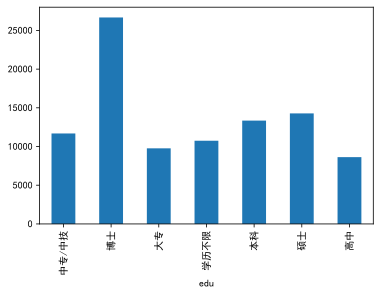

In [51]:
edu_salary_avg.plot(kind='bar')

In [52]:
#不同学历区间工作机会情况

In [53]:
#法一、count聚合函数
edu_salary_count = edu_salary.count()

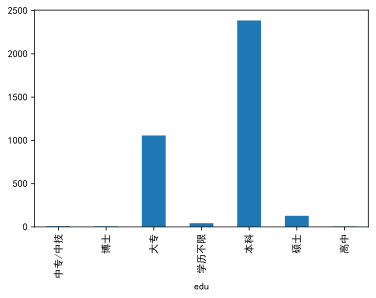

In [54]:
edu_salary_count.plot(kind='bar')

In [55]:
edu_salary_count

edu
中专/中技       8
博士          6
大专       1057
学历不限       43
本科       2386
硕士        128
高中          4
Name: avg_salary, dtype: int64

In [56]:
#法二、value_counts方法
df.edu.value_counts()

本科       2386
大专       1057
硕士        128
学历不限       43
中专/中技       8
博士          6
高中          4
Name: edu, dtype: int64

In [57]:
#城市对薪资的影响
city_salary = df.groupby(by='city').avg_salary

In [58]:
#各城市平均薪资情况
city_salary_avg = city_salary.mean().sort_values(ascending=False)

In [59]:
city_salary_avg

city
杭州    14818.652850
南京    14791.921397
苏州    14506.329114
上海    14346.590909
北京    13760.377358
成都    12599.442379
长沙    12581.521739
宁波    12395.348837
西安    12116.744186
武汉    12059.917355
深圳    12016.791045
广州    11834.572491
济南    11704.787234
福州    11326.948052
大连    11067.307692
重庆    10828.676471
长春    10629.032258
无锡    10611.403509
郑州    10169.856459
青岛     9232.824427
沈阳     8916.666667
Name: avg_salary, dtype: float64

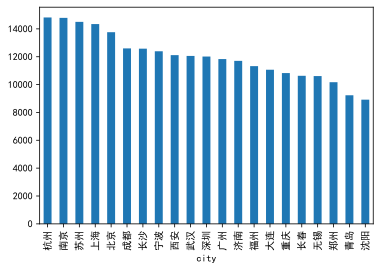

In [60]:
city_salary_avg.plot(kind='bar')

In [61]:
#计算城市薪资区间中位数 (前十)
city_salary_med = city_salary.median().sort_values(ascending=False)[:10]

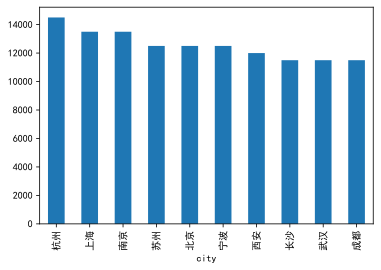

In [62]:
city_salary_med.plot(kind='bar')

In [63]:
#各城市岗位
city_salary_count = city_salary.count().sort_values(ascending=False)

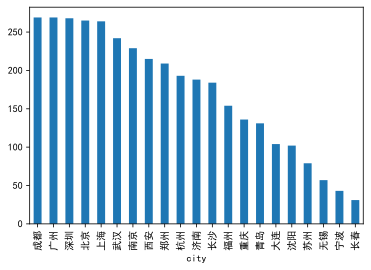

In [64]:
city_salary_count.plot(kind='bar')

In [65]:
#工作经验对薪资的影响
#不同工作经验区间工作比较

In [66]:
# df[['min_work', 'max_work']] = df.work.str.split('-', 2, expand=True)

In [67]:
df

,job_title,company,person_number,salary,path,work,edu,skill,avg_salary,city
0,数据分析师,北京与车行信息技术有限公司,20-99人,1.2万-1.8万,北京-朝阳,3-5年,本科,数据挖掘数据采集行业分析大数据平台数据监控数据分析,15000.0,北京
1,数据处理工程师,南京思影科技有限公司,20-99人,1.2万-2万,北京-石景山,不限,本科,MATLABPython机器学习神经网络,16000.0,北京
2,数据分析,北京中关村科技融资担保有限公司,100-299人,2万-3.5万,北京,5-10年,本科,PythonSQLSASPower BI商业数据分析金融数据分析风控数据分析财务数据分析,27500.0,北京
3,数据分析师,内蒙古钛驰新迪商务有限公司,20-99人,8千-1.5万,北京-海淀,1年以下,大专,Java商业数据分析运营数据分析财务数据分析风控数据分析游戏数据分析销售数据分析,11500.0,北京
4,数据分析师（报告写作方向）,北京新媒体(集团)有限公司,100-299人,1万-1.5万,北京-朝阳,1-3年,本科,舆情分析运营数据分析,12500.0,北京
...,...,...,...,...,...,...,...,...,...,...
3670,数据开发工程师（2023届校园招聘）,新意科技,500-999人,3.3千-4.4千,福州-鼓楼,无经验,本科,JavaOracle,3850.0,福州
3671,软件开发中级工程师（数据仓库）,新大陆软件,1000-9999人,8千-1.4万,福州,3-5年,本科,数据仓库,11000.0,福州
3672,JAVA工程师（大数据开发方向）,福州飞豹电子商务有限公司,20-99人,1万-1.8万,福州,1-3年,本科,MySQLHTMLCSSMemcacheDBSpringBootSpringCloudJav...,14000.0,福州
3673,大数据开发工程师,江苏正瑞信息科技有限公司,20-99人,1.3万-1.8万,福州-鼓楼,3-5年,大专,数据中台数仓开发JavaHadoopOracleMySQL数据平台HBase,15500.0,福州


In [68]:
df.work.unique()

array(['3-5年', '不限', '5-10年', '1年以下', '1-3年', '无经验', '10年以上'],
      dtype=object)

In [69]:
work_salary = df.groupby(by='work').avg_salary

In [70]:
work_salary

In [71]:
work_salary_avg = work_salary.mean().sort_values(ascending=False)

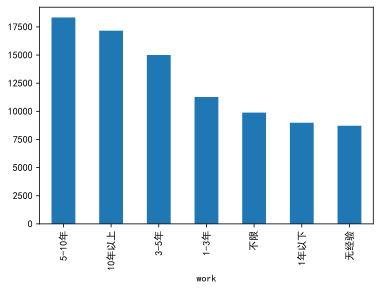

In [72]:
work_salary_avg.plot(kind='bar')

In [73]:
work_salary_med = work_salary.median().sort_values(ascending=False)

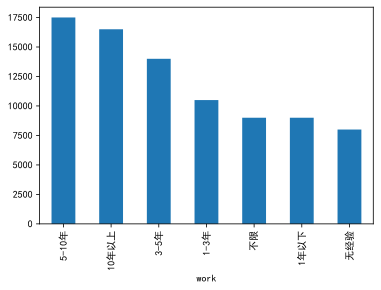

In [74]:
work_salary_med.plot(kind='bar')

In [75]:
work_num = df.work.value_counts()

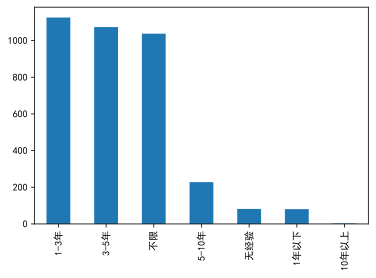

In [76]:
work_num.plot(kind='bar')

In [77]:
skill_count = df.skill.str.contains('Python').sum()

In [78]:
skill_count

1006

In [79]:
skill_count = pd.Series(data={
    'Python':df.skill.str.contains('Python').sum(),
    'SQL':df.skill.str.contains('SQL').sum(),
    '数据分析':df.skill.str.contains('数据分析').sum(),
    'Excel':df.skill.str.contains('Excel').sum(),
    '机器学习':df.skill.str.contains('机器学习').sum(),
    '数据挖掘':df.skill.str.contains('数据挖掘').sum(),
    '数据仓库':df.skill.str.contains('数据仓库').sum()
})

In [80]:
skill_count

Python    1006
SQL       1277
数据分析      1448
Excel      104
机器学习        93
数据挖掘       245
数据仓库       124
dtype: int64

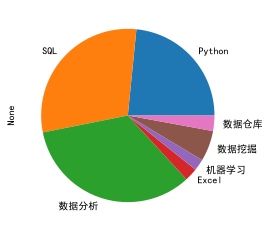

In [81]:
skill_count.plot(kind='pie')

In [82]:
#调用类
from pyecharts import options as opts
#柱状图调用的模块
from pyecharts.charts import Bar
from pyecharts.charts import Pie

In [83]:
edu_list = edu_salary_avg.index.to_list()

In [84]:
edu_list

['中专/中技', '博士', '大专', '学历不限', '本科', '硕士', '高中']

In [85]:
edu_value = edu_salary_avg.values
edu_value_list = []
for i in edu_value:
    edu_value_list.append(i)

In [86]:
edu_value_list

[11687.5, 26666.667, 9761.684, 10744.186, 13346.186, 14277.344, 8625.0]

In [87]:
edu_bar = (
    Bar()
    .add_xaxis(edu_list)
    .add_yaxis("人数", edu_value_list)
    .set_global_opts(
        title_opts = opts.TitleOpts(title="学历对薪资的影响", subtitle="/元"),
        yaxis_opts = opts.AxisOpts(name='Y轴'),
        xaxis_opts = opts.AxisOpts(name='X轴')
    )
    .render_notebook()
)

In [88]:
edu_bar

In [89]:
skill_list = skill_count.index.to_list()

In [90]:
skill_list

['Python', 'SQL', '数据分析', 'Excel', '机器学习', '数据挖掘', '数据仓库']

In [91]:
# skill_value_lsit = []
# skill_value = skill_count.values
# for i in skill_value:
#     skill_value_lsit.append(i)
skill_value_lsit = skill_count.values.tolist()

In [92]:
skill_value_lsit

[1006, 1277, 1448, 104, 93, 245, 124]

In [93]:
a = zip(skill_list, skill_value_lsit)
for i in a:
    print(i)

('Python', 1006)
('SQL', 1277)
('数据分析', 1448)
('Excel', 104)
('机器学习', 93)
('数据挖掘', 245)
('数据仓库', 124)


In [94]:
skill_pie = (
    Pie()
    .add("技能", [z for z in zip(skill_list, skill_value_lsit)])
     #全局配置项
    .set_global_opts(title_opts=opts.TitleOpts(title="技能需求"))
    #系列配置项
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    #生成图表
    .render_notebook()
#     .render("pie_base.html")
)

In [95]:
skill_pie